In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob

In [4]:
X_train = np.load('drive/MyDrive/Colab_Notebooks/project/datasets/train/Xtrain.npy')
y_train = np.load('drive/MyDrive/Colab_Notebooks/project/datasets/train/ytrain.npy')
X_val = np.load('drive/MyDrive/Colab_Notebooks/project/datasets/val/Xval.npy')
y_val = np.load('drive/MyDrive/Colab_Notebooks/project/datasets/val/yval.npy')
X_test = np.load('drive/MyDrive/Colab_Notebooks/project/datasets/test/Xtest.npy')
y_test = np.load('drive/MyDrive/Colab_Notebooks/project/datasets/test/ytest.npy')

In [5]:
model = tf.keras.Sequential()

In [6]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(228, 228,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [7]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [8]:
model.add(tf.keras.layers.Flatten())

In [9]:
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [10]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
55/55 [==============================] - 23s 232ms/step - loss: 2.3682 - accuracy: 0.1465 - val_loss: 2.0858 - val_accuracy: 0.2463
Epoch 2/50
55/55 [==============================] - 11s 195ms/step - loss: 2.0948 - accuracy: 0.2229 - val_loss: 1.8824 - val_accuracy: 0.3242
Epoch 3/50
55/55 [==============================] - 11s 196ms/step - loss: 1.9670 - accuracy: 0.2666 - val_loss: 1.6231 - val_accuracy: 0.4479
Epoch 4/50
55/55 [==============================] - 11s 197ms/step - loss: 1.8110 - accuracy: 0.3208 - val_loss: 1.4242 - val_accuracy: 0.5498
Epoch 5/50
55/55 [==============================] - 11s 199ms/step - loss: 1.6841 - accuracy: 0.3761 - val_loss: 1.2849 - val_accuracy: 0.6151
Epoch 6/50
55/55 [==============================] - 11s 201ms/step - loss: 1.5522 - accuracy: 0.4208 - val_loss: 1.1775 - val_accuracy: 0.6254
Epoch 7/50
55/55 [==============================] - 11s 203ms/step - loss: 1.4548 - accuracy: 0.4588 - val_loss: 1.0862 - val_accuracy: 0.6747

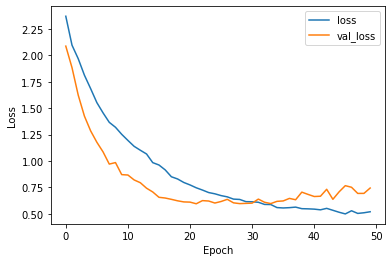

In [13]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

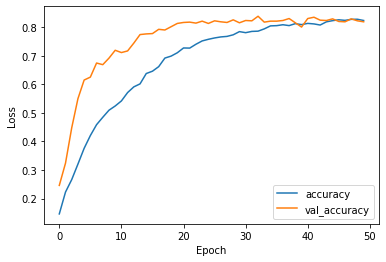

In [14]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 27ms/step - loss: 0.8737 - accuracy: 0.8238


[0.873719334602356, 0.823798656463623]